# Create box and get co-ordinates for bbox

In [2]:
!pip install torch

In [3]:
!pip install torchvision

In [4]:
from PIL import Image
import cv2

In [5]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # or yolov5m, yolov5l, yolov5x, custom



Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/sharath/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-4-14 torch 1.10.2+cu102 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [53]:

# Images
#img =  '/home/sharath/Thesis/virtual/data_creation/image/group-people-standing-row-45075617.jpg' #img_path  # or file, Path, PIL, OpenCV, numpy, list
img =  '/home/sharath/Thesis/virtual/data_creation/image/cctv.jpg'
# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 760x1467 20 persons, 1 bicycle, 1 umbrella, 2 sports balls
Speed: 17.2ms pre-process, 126.6ms inference, 1.1ms NMS per image at shape (1, 3, 352, 640)


In [54]:
results.show()

In [55]:
# Images
#img = '/home/sharath/Thesis/virtual/data_creation/image/group-people-standing-row-45075617.jpg'  # or file, Path, PIL, OpenCV, numpy, list
img =  '/home/sharath/Thesis/virtual/data_creation/image/cctv.jpg'

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

In [56]:
good = results.pandas()

In [57]:
print(results.tolist())

In [58]:
type(good)

models.common.Detections

In [59]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,278.568512,649.398865,300.380066,673.414368,0.651412,32,sports ball
1,1040.261353,274.242981,1067.701660,328.997833,0.639237,0,person
2,838.410889,366.592163,862.847229,428.695679,0.635829,0,person
3,242.017120,702.670593,268.576660,731.253540,0.630132,32,sports ball
4,31.141857,229.305679,50.447159,267.586884,0.605782,0,person
5,317.329041,596.939392,368.343018,663.026855,0.604359,0,person
6,1277.204346,361.095856,1307.998047,415.892822,0.591572,0,person
7,770.597046,355.158997,802.245544,428.207642,0.586248,0,person
8,933.078796,350.152649,963.957458,410.425629,0.581166,0,person
9,156.989517,232.830368,186.672882,294.885742,0.575580,0,person


In [60]:
box_coordinate = results.pandas().xyxy[0]

In [61]:
people_box = box_coordinate[box_coordinate["class"]==0][["xmin", "ymin"]]

In [62]:
people_box

,xmin,ymin
1,1040.261353,274.242981
2,838.410889,366.592163
4,31.141857,229.305679
5,317.329041,596.939392
6,1277.204346,361.095856
7,770.597046,355.158997
8,933.078796,350.152649
9,156.989517,232.830368
10,703.464539,472.776886
11,721.036621,255.350891


In [63]:
results.save('./output/.jpeg')

Saved 1 image to runs/detect/exp5


# Crop image based on coordinates

In [64]:
results.crop()

Saved 1 image to runs/detect/exp6
Saved results to runs/detect/exp6



[{'box': [tensor(976.14008),
   tensor(229.29599),
   tensor(1018.24939),
   tensor(260.99161)],
  'conf': tensor(0.27152),
  'cls': tensor(25.),
  'label': 'umbrella 0.27',
  'im': array([[[118, 130, 132],
          [119, 131, 133],
          [121, 133, 135],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[114, 123, 126],
          [111, 120, 123],
          [117, 126, 129],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[112, 119, 122],
          [109, 116, 119],
          [112, 119, 122],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[ 76,  73,  75],
          [ 82,  79,  81],
          [103, 100, 102],
          ...,
          [ 89,  88,  92],
          [ 93,  92,  96],
          [ 73,  72,  76]],
  
         [[109, 106, 108],
          [104, 101, 103],
          [ 96,  91,  93]

# get face and body landmarks

In [65]:
#person_image_1 = '/home/sharath/Thesis/virtual/data_creation/runs/detect/exp2/crops/person/group-people-standing-row-450756175.jpg'
#person_image_2 = '/home/sharath/Thesis/virtual/data_creation/runs/detect/exp2/crops/person/group-people-standing-row-450756174.jpg'

person_image_1 = '/home/sharath/Thesis/virtual/data_creation/runs/detect/exp6/crops/person/cctv5.jpg'
person_image_1 = '/home/sharath/Thesis/virtual/data_creation/runs/detect/exp6/crops/person/cctv6.jpg'

In [66]:
import cv2
import mediapipe as mp
import numpy as np

In [67]:
# initialize mediapipe 
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [68]:
file_list = [person_image_1, person_image_2]
BG_COLOR = 0

In [69]:
print (Image)

<module 'PIL.Image' from '/home/sharath/Thesis/virtual/lib/python3.9/site-packages/PIL/Image.py'>


In [70]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [71]:

# For static images:
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(file_list):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
    )
    # Draw pose landmarks on the image.
    annotated_image = image.copy()
    # Use mp_pose.UPPER_BODY_POSE_CONNECTIONS for drawing below when
    # upper_body_only is set to True.
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imwrite('/home/sharath/Thesis/virtual/data_creation/output/landmarks/' + str(idx) + '.png', annotated_image)

Nose coordinates: (13.663337051868439, 17.980079725384712)
Nose coordinates: (78.58869123458862, 54.4801929295063)


In [72]:
import pandas as pd

In [73]:
type(results)

type

In [74]:
mp_holistic.PoseLandmark.NOSE

<PoseLandmark.NOSE: 0>

In [75]:
#results.POSE_LANDMARKS

In [76]:
0.46778982877731323 * image_width

78.58869123458862

In [77]:
results.pose_landmarks

landmark {
  x: 0.46778982877731323
  y: 0.10259923338890076
  z: -0.5079432725906372
  visibility: 0.999984622001648
}
landmark {
  x: 0.5052784085273743
  y: 0.08577999472618103
  z: -0.4398389160633087
  visibility: 0.9999504089355469
}
landmark {
  x: 0.5300392508506775
  y: 0.086091548204422
  z: -0.4401692748069763
  visibility: 0.9999549388885498
}
landmark {
  x: 0.5500047206878662
  y: 0.08651652932167053
  z: -0.4403664171695709
  visibility: 0.9999594688415527
}
landmark {
  x: 0.4294435977935791
  y: 0.08661496639251709
  z: -0.41187769174575806
  visibility: 0.9999319314956665
}
landmark {
  x: 0.40910428762435913
  y: 0.0871092677116394
  z: -0.41185277700424194
  visibility: 0.9999244213104248
}
landmark {
  x: 0.38906463980674744
  y: 0.08822232484817505
  z: -0.4119126796722412
  visibility: 0.9999300241470337
}
landmark {
  x: 0.59577876329422
  y: 0.09750872850418091
  z: 0.003413473255932331
  visibility: 0.9999401569366455
}
landmark {
  x: 0.375741183757782
  y: 0

# mediapip from colab

In [78]:
file_list=[person_image_1, person_image_2]

In [79]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

# For static images:
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(file_list):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
    )
    # Draw pose landmarks on the image.
    annotated_image = image.copy()
    # Use mp_pose.UPPER_BODY_POSE_CONNECTIONS for drawing below when
    # upper_body_only is set to True.
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imwrite(str(idx) + '.png', annotated_image)

Nose coordinates: (13.663337051868439, 17.980079725384712)
Nose coordinates: (78.58869123458862, 54.4801929295063)


In [80]:
%matplotlib inline 

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

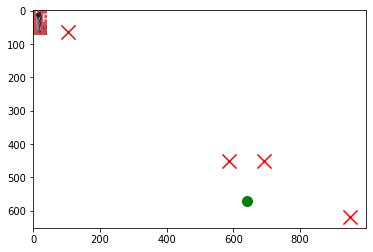

In [82]:
image = mpimg.imread(file_list[0])
pts = np.array([[104.98113083839417, 63.40533792972565],[950,620],[692,450],[587,450]])

plt.imshow(image)
plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)
plt.show()


1323.052490	129.134125	1478.040894	640.248169

In [83]:
people_box

,xmin,ymin
1,1040.261353,274.242981
2,838.410889,366.592163
4,31.141857,229.305679
5,317.329041,596.939392
6,1277.204346,361.095856
7,770.597046,355.158997
8,933.078796,350.152649
9,156.989517,232.830368
10,703.464539,472.776886
11,721.036621,255.350891


In [84]:
people_box.set_index("index", inplace=True)

KeyError: "None of ['index'] are in the columns"

In [85]:
xmin = float(people_box[3:4]["xmin"])

In [86]:
ymin = float(people_box[3:4]["ymin"])

In [87]:
type(xmin)

float

In [88]:
type(ymin)

float

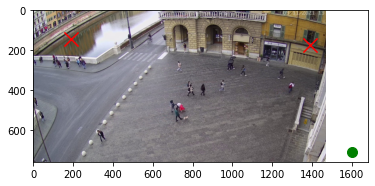

In [90]:
#image = mpimg.imread("/home/sharath/Thesis/virtual/data_creation/image/group-people-standing-row-45075617.jpg")
image = mpimg.imread("/home/sharath/Thesis/virtual/data_creation/image/cctv.jpg")

pts = np.array([[104 + 94 - 10, 63 + 91 - 10],[78 + 1323 - 10 , 54 + 129 - 10]])

plt.imshow(image)
plt.plot(1600, 711, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)
plt.show()

In [91]:
def place_landmarks(image_path, xmin, ymin, xnose, ynose):
    image = mpimg.imread(image_path)

    pts = np.array([[xmin + xnose - 10, ymin + ynose - 10]])

    plt.imshow(image)
    plt.plot(1600, 711, "og", markersize=10)  # og:shorthand for green circle
    plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)
    plt.show()

In [92]:
image_path = "//home/sharath/Thesis/virtual/data_creation/image/cctv.jpg"

In [101]:
place_landmarks(image_path, xmin, ymin, 104.98113083839417, 63.40533792972565)

TypeError: place_landmarks() takes 3 positional arguments but 5 were given

In [94]:
def landmark_bigimage(xmin, ymin, xlandmark, ylandmark, err = 10):
    xbig = xmin + xlandmark - err
    ybig = ymin + ylandmark - err
    return xbig, ybig

In [95]:
def place_landmarks(image_path, xbig, ybig):
    image = mpimg.imread(image_path)

    pts = np.array([[xbig, ybig]])

    plt.imshow(image)
    plt.plot(1600, 711, "og", markersize=10)  # og:shorthand for green circle
    plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)
    plt.show()

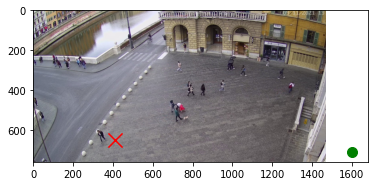

In [96]:
xbig , ybig = landmark_bigimage(xmin, ymin, 104.98113083839417, 63.40533792972565)
place_landmarks(image_path, xbig, ybig)

In [97]:
type(results.pose_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [98]:
mp_holistic.PoseLandmark.RIGHT_SHOULDER

<PoseLandmark.RIGHT_SHOULDER: 12>

In [99]:
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].x * image_width

44.74504280090332

In [ ]:
if results.pose_landmarks:
                results.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image
                mpDraw.draw_landmarks(blank_image, results.pose_landmarks,mpPose.POSE_CONNECTIONS ,
                     mpDraw.DrawingSpec(color=(255,0,255),
                                            thickness=1,
                                            circle_radius=1),
                     mpDraw.DrawingSpec(color=(0,255,255),
                                            thickness=10,
                                            circle_radius=1)
                     )


# getting from yolo to x, y, h, w

In [67]:
img_path = '/Users/piyush2017/Downloads/group-people-standing-row-45075617.jpg'

In [68]:
from PIL import Image

In [69]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

im=Image.open(img_path)
w= int(im.size[0])
h= int(im.size[1])

xmin = 873.434570
ymin = 186.026672
xmax = 899.530029
ymax = 328.346588

print('heigh:', h, 'width:', w)
print(xmin, xmax, ymin, ymax) #define your x,y coordinates
b = (xmin, xmax, ymin, ymax)
bb = convert((w,h), b)
print('new value', bb)

heigh: 711 width: 1600
873.43457 899.530029 186.026672 328.346588
new value (0.5540514371874999, 0.36172521800281293, 0.016309661875000003, 0.2001686582278481)


In [72]:
bb[0] * w

886.4822995

In [53]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,619.945923,126.710442,774.325012,634.278687,0.935078,0,person
1,787.858398,102.214478,961.495667,641.818604,0.934495,0,person
2,1143.474609,114.228218,1301.466675,645.665894,0.932482,0,person
3,94.628685,91.733788,277.513580,636.433655,0.922834,0,person
4,1323.052490,129.134125,1478.040894,640.248169,0.919323,0,person
5,428.658630,106.284019,607.996948,636.429688,0.918148,0,person
6,975.674866,134.379868,1119.689575,637.628174,0.916426,0,person
7,296.136139,117.863091,427.928650,634.783020,0.895701,0,person
8,873.434570,186.026672,899.530029,328.346588,0.576240,27,tie
9,477.551941,185.341568,533.461060,376.818970,0.352742,27,tie


### x,y,h,w

In [ ]:
w = xmax - xmin
h = ymax - ymin
x = xmin
y = ymin

### super impose the coordinates on to original image

### itarate over files/directory 

In [14]:
import os
# assign directory
directory = '/home/sharath/Thesis/virtual/OID/Dataset/train/Man'
 


In [17]:
def itr(directory):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
    # checking if it is a file
        if os.path.isfile(f):
            print(f)

In [21]:
itr(directory = '/home/sharath/Thesis/virtual/OID/Dataset/train/Woman')

/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/29ebef0efbe215b5.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/800673175c5954aa.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/0df751e2dc5c2f4a.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/967256cc68470d4b.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/582eead8501e6548.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/ee7fc22d49b2cd3b.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/acce649e572bb5c2.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/56e6ded4e5a2e0b6.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/f22337ac50095e24.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/bae6729a5ef5b0b1.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/41b6c5ba7b2aa004.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/7f9be7d52394bfce.jpg
/home/sharath/Thesis/virtual/OID/Dataset/train/Woman/981221e329df8aec.jpg
/home/sharath/Thesis/virtual/OID/Datas